In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = 'nombres.csv'
col_names = ['anio','nombre','sexo','n','proporcion']
nombre_estudiado = 'Pablo'
sexo_persona = 'M'

In [2]:
file = pd.read_csv('nombres.csv',encoding='latin-1',on_bad_lines='skip') #con el comando on_bad_lines skip, 
#de 858782 entradas quedaron 858778

In [3]:
file.head()

,anio,nombre,sexo,n,proporcion
0,1920,Aaron,M,1,0.000049
1,1920,Abdolina,F,1,0.000049
2,1920,Abdon,M,1,0.000049
3,1920,Abdón,M,2,0.000098
4,1920,Abel,M,11,0.000540


In [4]:
años = file['anio']
años = list(set(años))

hombres = []
mujeres = []
otros = []

for año in años:

    df = file[(file['anio']==año)]
    total_año = df['n'].sum()
    total_hombres = df[(df['sexo']=='M')]['n'].sum()
    total_otros = df[(df['sexo']=='I')]['n'].sum()
    total_mujeres = total_año - total_hombres - total_otros

    hombres.append(total_hombres/total_año)
    mujeres.append(total_mujeres/total_año)
    otros.append(total_otros/total_año)

In [5]:
bd = {'anio': años,
      'proporcion_hombres':hombres,
      'proporcion_mujeres':mujeres,
      'proporcion_otros':otros}

bd = pd.DataFrame(bd)
#bd.to_excel('gender.xlsx')

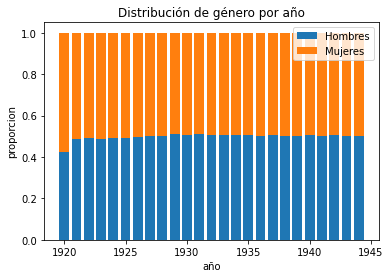

In [8]:
fig, ax = plt.subplots()

x = bd['anio'].iloc[:25]

h = bd['proporcion_hombres'].iloc[:25]
m = bd['proporcion_mujeres'].iloc[:25]

# First plot the 'Male' bars for every day.
ax.bar(x, h, label='Hombres')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(x, m, bottom=h,
       label='Mujeres')


ax.set_title('Distribución de género por año')

plt.xlabel('año')
plt.ylabel('proporcion')
ax.legend()


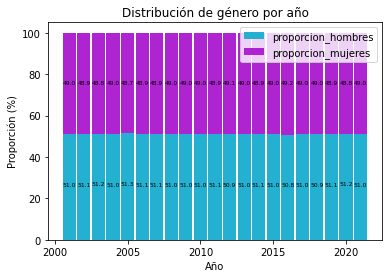

In [50]:
bd_new = bd.iloc[81:,:3]
bd_new['proporcion_hombres'] = 100*bd_new['proporcion_hombres']
bd_new['proporcion_mujeres'] = 100*bd_new['proporcion_mujeres']

bd_new = bd_new.set_index('anio')

#bd_new.index = bd_new.astype('object')

fig, ax = plt.subplots()

colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(bd_new))

for i, col in enumerate(bd_new.columns):
  ax.bar(
      bd_new.index, bd_new[col], bottom=bottom, label=col, color=colors[i],width = 0.9),
  bottom += np.array(bd_new[col])



# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -25
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      #round(bar.get_height(),2),
      round(bar.get_height(),1),
      # Center the labels and style them a bit.
      ha='center',
      color='black',
      
      size=6
  )
plt.xlabel('Año')
plt.ylabel('Proporción (%)')
ax.set_title('Distribución de género por año')
ax.legend()


In [55]:
IC_hombres = [bd['proporcion_hombres'].mean() - 1.96*bd['proporcion_hombres'].std()/(np.sqrt(len(bd['proporcion_hombres']))),
             bd['proporcion_hombres'].mean() + 1.96*bd['proporcion_hombres'].std()/(np.sqrt(len(bd['proporcion_hombres'])))]

IC_mujeres = [bd['proporcion_mujeres'].mean() - 1.96*bd['proporcion_mujeres'].std()/(np.sqrt(len(bd['proporcion_mujeres']))),
              bd['proporcion_mujeres'].mean() + 1.96*bd['proporcion_mujeres'].std()/(np.sqrt(len(bd['proporcion_mujeres'])))]

IC_mujeres

[0.49375223076201147, 0.49759544429304525]